# **Logistic Regression**

### **Importing All Necessary Libraries**

In [39]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

### **Data Framing**

In [40]:
df = pd.read_csv('HR_dataset.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [41]:
print(f"data shape: {df.shape}\n") # Checking data shape
print(df.isnull().sum(), "\n") # Checking null values
print(df.describe())

data shape: (14999, 10)

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64 

       satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   1

### **Preprocessing**

Convert categorical variables to numerical

In [42]:
le_dept = LabelEncoder()
le_salary = LabelEncoder()

df['Department'] = le_dept.fit_transform(df['Department'])
df['salary'] = le_salary.fit_transform(df['salary'])
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,8,1
14995,0.37,0.48,2,160,3,0,1,0,8,1
14996,0.37,0.53,2,143,3,0,1,0,8,1
14997,0.11,0.96,6,280,4,0,1,0,8,1


### **Extract relevant columns**

In [43]:
X = df.drop('left', axis=1)
y = df['left']

### **Standardize the features before applying PCA**

In [44]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### **Reduce the dataset to 2D for visualization using PCA**

In [45]:
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_scaled)

### **Splitting the dataset**

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.3, random_state=42)

### **Training the Model**

In [47]:
# Initialize the Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

### **Plotting the decision boundary**

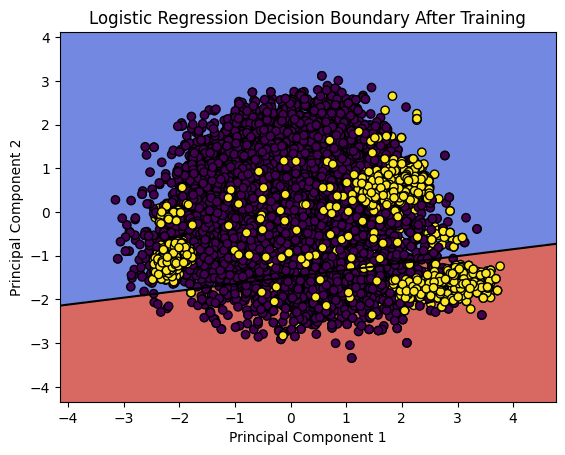

In [54]:
xx, yy = np.meshgrid(np.linspace(X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1, 500),
                     np.linspace(X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1, 500))
grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = model.predict(grid_points)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, edgecolors='k', marker='o')

# Plot the logistic regression decision boundary line
coef = model.coef_[0]
intercept = model.intercept_
slope = -coef[0] / coef[1]
intercept_ = -intercept / coef[1]
x_vals = np.array(plt.gca().get_xlim())
y_vals = slope * x_vals + intercept_
plt.plot(x_vals, y_vals, c="black")

plt.title('Logistic Regression Decision Boundary After Training')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

### **Predict on the test data**

In [49]:
predictions = model.predict(X_test)

In [50]:
print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))

[[3171  257]
 [ 815  257]]
0.7617777777777778
